# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print "Neighbour triangles\n",tri.neighbors[0:5]
print "Simplices\n", tri.simplices[0:5]
print "Points\n", points[tri.simplices[0:5]]

Neighbour triangles
[[ 2 -1  1]
 [-1  7  0]
 [38  0 23]
 [ 8 -1 18]
 [19  9 24]]
Simplices
[[22  8 23]
 [ 8 22 27]
 [ 8 26 23]
 [21 12 27]
 [ 1 12  0]]
Points
[[[ 0.94533774  0.94020853]
  [ 0.84908731  0.82640064]
  [ 0.96050533  0.71850392]]

 [[ 0.84908731  0.82640064]
  [ 0.94533774  0.94020853]
  [ 0.85148952  0.98353616]]

 [[ 0.84908731  0.82640064]
  [ 0.83636273  0.58887273]
  [ 0.96050533  0.71850392]]

 [[ 0.13703595  0.89399952]
  [ 0.43152261  0.83668016]
  [ 0.85148952  0.98353616]]

 [[ 0.62872151  0.70587617]
  [ 0.43152261  0.83668016]
  [ 0.32993679  0.55419941]]]


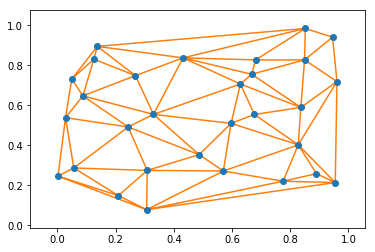

In [7]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

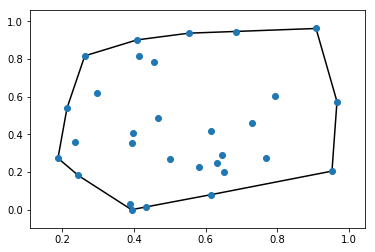

In [28]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

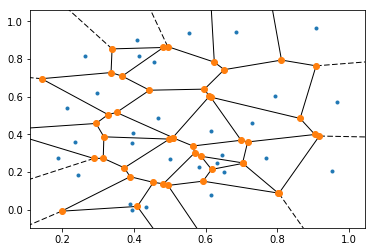

In [24]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [46]:
from scipy.spatial import KDTree, cKDTree

In [47]:
tree = cKDTree(points)

print tree.data

[[ 0.32993679  0.55419941]
 [ 0.62872151  0.70587617]
 [ 0.20920614  0.14805674]
 [ 0.5699455   0.27109087]
 [ 0.24286026  0.4912559 ]
 [ 0.0017104   0.24566229]
 [ 0.306542    0.07781904]
 [ 0.95456346  0.21348874]
 [ 0.84908731  0.82640064]
 [ 0.77545382  0.22008583]
 [ 0.3083994   0.27414984]
 [ 0.66750231  0.75477215]
 [ 0.43152261  0.83668016]
 [ 0.02771088  0.53777094]
 [ 0.88993794  0.25787426]
 [ 0.26794597  0.74796081]
 [ 0.04904329  0.73068422]
 [ 0.08745464  0.64655247]
 [ 0.67685074  0.55372841]
 [ 0.8274142   0.40186401]
 [ 0.59658283  0.50928608]
 [ 0.13703595  0.89399952]
 [ 0.94533774  0.94020853]
 [ 0.96050533  0.71850392]
 [ 0.12478722  0.83013634]
 [ 0.48690588  0.35283754]
 [ 0.83636273  0.58887273]
 [ 0.85148952  0.98353616]
 [ 0.68088393  0.82652234]
 [ 0.05611235  0.28627537]]


In [48]:
%%timeit

tree.query((0.5,0.5))

The slowest run took 14.03 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 29.9 µs per loop


In [49]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [50]:
%%timeit

tree.query(test_points) 

1000 loops, best of 3: 591 µs per loop


In [51]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [52]:
%%timeit

KDTree(more_points)

10 loops, best of 3: 27.3 ms per loop


In [53]:
%%timeit

big_tree.query(test_points) 

10 loops, best of 3: 115 ms per loop


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently). 


In [86]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [87]:
print brute_force_distance(more_points, (0.0,0.0))
print big_tree.query((0.0,0.0))

(0.0061911794498409811, 9384)
(0.0061911794498409811, 9384)


In [88]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

10000 loops, best of 3: 34.4 µs per loop


In [85]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 32.7 µs per loop


In [90]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))


1000 loops, best of 3: 672 µs per loop


In [82]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

1000 loops, best of 3: 539 µs per loop
